In [2]:
from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
path='/drive/MyDrive/Colab Notebooks/boston.csv'
df=pd.read_csv(path)

In [4]:
Y = df['PRICE']
X = df.drop("PRICE",axis=1)

In [60]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import initializers
from keras import regularizers

In [8]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

In [14]:
def create_model(activation ='relu', optimizer='adam', dropout_rate=0.1):
  model = Sequential()
  model.add(Dense(200,input_dim=13, activation =activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(200, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(200, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation=activation))

  model.compile(loss='mae', optimizer = optimizer, metrics=['mae'])
  return model

In [20]:
# create model
model1= KerasRegressor(model=create_model, loss ='mae', epochs = 20, batch_size =100, verbose=0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
activation = ['relu','elu','linear']
dropout_rate =[0.1,0.3,0.5,0.7]
epochs = [20,50,90,130]
param_grid = dict(optimizer = optimizer, model__activation=activation, model__dropout_rate=dropout_rate, epochs = epochs)
grid = GridSearchCV(estimator = model1, param_grid = param_grid, n_jobs = -1, cv =3)
grid_result = grid.fit(X_train, Y_train)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

In [16]:
print("Best:%f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with : %r" % (mean, stdev, param))

Best:0.764174 using {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Adam'}
0.746403 (0.055630) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'SGD'}
0.760615 (0.024745) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'RMSprop'}
0.764174 (0.048271) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Adam'}
0.759626 (0.040240) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Adagrad'}
0.750630 (0.055249) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Adadelta'}
0.738121 (0.052835) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Adamax'}
0.751880 (0.055092) with : {'model__activation': 'relu', 'model__dropout_rate': 0.1, 'optimizer': 'Nadam'}
0.745537 (0.058137) with : {'model__activation': 'relu', 'model__dropout_rate': 0.3, 'optimizer': 'SGD'}
0.753087 (0.036113) with : {'model__activa

In [9]:
  model = Sequential()
  activation ='relu'
  optimizer = 'SGD'
  dropout_rate = 0.1
  model.add(Dense(200,input_dim=13, activation =activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(200, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(200, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation=activation))

  model.compile(loss='mae', optimizer = optimizer, metrics=['mae'])

In [10]:
model.compile(loss='mae',metrics=['mae'],optimizer = optimizer)
Test1 = model.fit(X_train,Y_train, epochs =100, batch_size =100, validation_data = (X_test, Y_test))

Epoch 1/100
5/5 [==============================] - 2s 103ms/step - loss: 22.4227 - mae: 22.4227 - val_loss: 21.8290 - val_mae: 21.8290
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 22.1046 - mae: 22.1046 - val_loss: 21.4566 - val_mae: 21.4566
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 21.7180 - mae: 21.7180 - val_loss: 21.0174 - val_mae: 21.0174
Epoch 4/100
5/5 [==============================] - 0s 24ms/step - loss: 21.2390 - mae: 21.2390 - val_loss: 20.4271 - val_mae: 20.4271
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 20.5888 - mae: 20.5888 - val_loss: 19.5765 - val_mae: 19.5765
Epoch 6/100
5/5 [==============================] - 0s 25ms/step - loss: 19.6103 - mae: 19.6103 - val_loss: 18.2565 - val_mae: 18.2565
Epoch 7/100
5/5 [==============================] - 0s 23ms/step - loss: 18.1564 - mae: 18.1564 - val_loss: 16.0718 - val_mae: 16.0718
Epoch 8/100
5/5 [==============================] - 0s 21ms/st

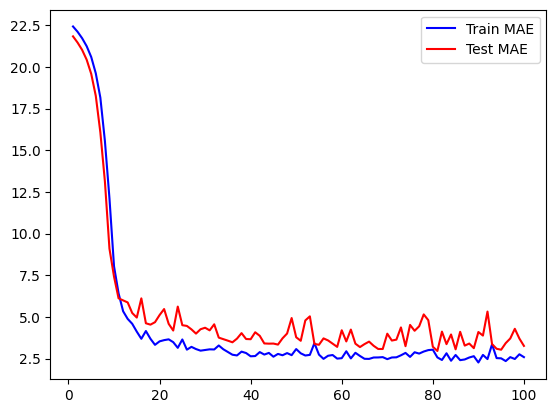

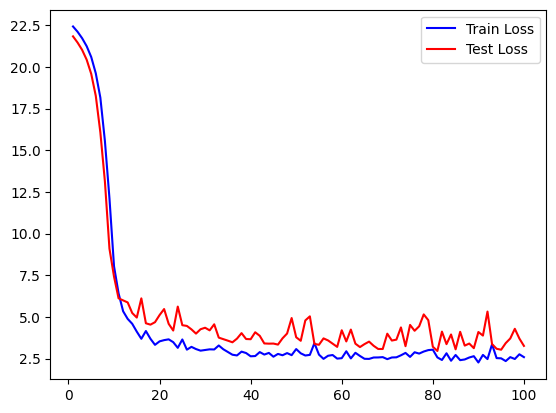

In [11]:
import matplotlib.pyplot as plt
acc2 = Test1.history['mae']
val_acc = Test1.history['val_mae']
loss2 = Test1.history['loss']
val_loss= Test1.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train MAE')
plt.plot(epochs, val_acc,'r',label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()